# LABORATORIO 2: Optimización de Redes

Jairo Garavito Correa - 202111499
Milton Andres Mesa - 202022496

In [77]:
from pyomo.environ import *

from pyomo.opt import SolverFactory

import matplotlib.pyplot as plt

import pandas as pd

import networkx as nx

## Problem 1: transport networks

Sets:

* Origin cities: S = {Bogotá, Medellín}
* destination cities: D = {Cali, Barranquilla, Pasto, Tunja, Chía, Manizales}

Parameters:

* Offer of the origin cities:
$$O_s = \forall s \in S$$

* Demand of the destination cities:
$$P_d = \forall d \in D$$

* Cost to send products from a supplier city to a customer city:
$$E_{s,d} = \forall {s \in S, d \in D}$$

Decision variables:

* Tons of products to be shipped from each city of origin to each destination city:
$$X_{s,d} = \forall {s \in S, d \in D}$$

Objective function:

* Minimize transport cost:
$$\text{Minimize} \sum_{s \in S} \sum_{d \in D} X_{s,d} \times E_{s,d}$$

Constraints:

* Demand of destination cities:

$$\sum_{s \in S}  X_{s,d} = P_d \space \forall d \in D $$

* Offer of the origin cities:

$$\sum_{d \in D}  X_{s,d} \leq O_s \space \forall s \in S $$


In [78]:
model = ConcreteModel()
model.dual = Suffix(direction=Suffix.IMPORT)

# Conjuntos
model.S = ['Bogotá', 'Medellín']  # Ciudades de origen
model.D = ['Cali', 'Barranquilla', 'Pasto', 'Tunja', 'Chía', 'Manizales']  # Ciudades de destino

# Parámetros
# Oferta en las ciudades de origen
model.O = {'Bogotá': 550, 'Medellín': 700}

# Demanda en las ciudades de destino
model.P = {'Cali': 125, 'Barranquilla': 175, 'Pasto': 225, 'Tunja': 250, 'Chía': 225, 'Manizales': 200}

# Costos de transporte de las ciudades de origen a las de destino
model.E = {
    ('Bogotá', 'Cali'): 100000000,
    ('Bogotá', 'Barranquilla'): 2.5,
    ('Bogotá', 'Pasto'): 1.6,
    ('Bogotá', 'Tunja'): 1.4,
    ('Bogotá', 'Chía'): 0.8,
    ('Bogotá', 'Manizales'): 1.4,
    ('Medellín', 'Cali'): 2.5,
    ('Medellín', 'Barranquilla'): 100000000,
    ('Medellín', 'Pasto'): 2.0,
    ('Medellín', 'Tunja'): 1.0,
    ('Medellín', 'Chía'): 1.0,
    ('Medellín', 'Manizales'): 0.8
}

# Variables de decisión
model.X = Var(model.S, model.D, domain=NonNegativeReals)

# Función objetivo: minimizar el costo de transporte
def objective_rule(model):
    return summation(model.E, model.X)
model.OBJ = Objective(rule=objective_rule, sense=1)  # sense=1 para minimizar

# Restricciones

# Restricción de demanda en las ciudades de destino
def demand_rule(model, d):
    return sum(model.X[s, d] for s in model.S) >= model.P[d]
model.DemandConstraint = Constraint(model.D, rule=demand_rule)

# Restricción de oferta en las ciudades de origen
def offer_rule(model, s):
    return sum(model.X[s, d] for d in model.D) <= model.O[s]
model.OfferConstraint = Constraint(model.S, rule=offer_rule)

# Resolver el modelo
solver = SolverFactory('glpk')
solver.solve(model)

print("\nSolution")
for s in model.S:
    for d in model.D:
        print(f"x[{s},{d}] = {model.X[s, d].value}")

#model.display()


Solution
x[Bogotá,Cali] = 0.0
x[Bogotá,Barranquilla] = 175.0
x[Bogotá,Pasto] = 225.0
x[Bogotá,Tunja] = 0.0
x[Bogotá,Chía] = 150.0
x[Bogotá,Manizales] = 0.0
x[Medellín,Cali] = 125.0
x[Medellín,Barranquilla] = 0.0
x[Medellín,Pasto] = 0.0
x[Medellín,Tunja] = 250.0
x[Medellín,Chía] = 75.0
x[Medellín,Manizales] = 200.0


ANALISIS DE SENSIBILIDAD

In [79]:
print("\nSensitivity Analysis")
print(f"y_demand = {[model.dual[model.DemandConstraint[d]] for d in model.D]}")
print(f"y_offer = {[model.dual[model.OfferConstraint[s]] for s in model.S]}")


Sensitivity Analysis
y_demand = [2.5, 2.7, 1.8, 1.0, 1.0, 0.8]
y_offer = [-0.2, 0.0]


NUEVO ANALISIS DE SENSIBILIDAD CON CAMBIO EN LAS OFERTAS

In [80]:
model.O = {'Bogotá': 600, 'Medellín': 650}

solver = SolverFactory('glpk')
solver.solve(model)

print("\nSolution")
for s in model.S:
    for d in model.D:
        print(f"x[{s},{d}] = {model.X[s, d].value}")


print("\nSensitivity Analysis")
print(f"y_demand = {[model.dual[model.DemandConstraint[d]] for d in model.D]}")
print(f"y_offer = {[model.dual[model.OfferConstraint[s]] for s in model.S]}")


Solution
x[Bogotá,Cali] = 0.0
x[Bogotá,Barranquilla] = 175.0
x[Bogotá,Pasto] = 225.0
x[Bogotá,Tunja] = 0.0
x[Bogotá,Chía] = 150.0
x[Bogotá,Manizales] = 0.0
x[Medellín,Cali] = 125.0
x[Medellín,Barranquilla] = 0.0
x[Medellín,Pasto] = 0.0
x[Medellín,Tunja] = 250.0
x[Medellín,Chía] = 75.0
x[Medellín,Manizales] = 200.0

Sensitivity Analysis
y_demand = [2.5, 2.7, 1.8, 1.0, 1.0, 0.8]
y_offer = [-0.2, 0.0]


Como se puede apreciar no existe una diferencia al modificar los valores de las ofertas, esto es debido a los valores fijos de las demandas y las restricciones respectivas.

## Problem 2: Optimal Routes for teams

Sets:

* Locations: N = {0,1,2,3,4,5}

Parameters:

* cost of transport
$$c_{ij} \quad \forall i \in N, \forall j \in N$$

Decision variables:

$$x_{ij} \quad \forall i \in N, \forall j \in N$$

$$u_{i} \quad \forall i \in N$$

Objective function:

$$
\begin{aligned}
\text{Minimize:} \quad & \sum_{i \in N} \sum_{j \in N} c_{ij} \cdot x_{ij} \\
\text{Subject to:} \quad & \sum_{j \in N, j \neq i} x_{ij} = 1 \quad \forall i \in N \quad \text{(Each city is left once)} \\
                         & \sum_{i \in N, i \neq j} x_{ij} = 1 \quad \forall j \in N \quad \text{(Each city is visited once)} \\
                         & u_i - u_j + (n-1) \cdot x_{ij} \leq n-1 \quad \forall i,j \in N, i \neq j \quad \text{(MTZ subtour elimination)} \\
                         & u_i \in \mathbb{R}, \quad u_1 = 1 \\
                         & x_{ij} \in \{0, 1\} \quad \forall i,j \in N
\end{aligned}
$$

In [81]:
#Modelo
model = ConcreteModel()

#Conjuntos
localidades = {0,1,2,3,4,5}

#Parametros
n = len(localidades)

df = pd.read_csv('./data2/proof_case.csv')
df.columns = [int(col.strip(" ")) for col in df.columns]
df = df.apply(pd.to_numeric)
for i in range(len(df)):
    df.iloc[i, i] = 999

costos = {}
for origen in localidades:
    for destino in localidades:
        costos[(origen, destino)] = int(df[origen][destino])
         
#Variable de decision
model.x = Var(localidades, localidades, domain=Binary)

#Funcion Objetivo
model.obj = Objective(
    expr = sum(sum(model.x[(i,j)]*costos[i,j] for j in localidades) for i in localidades), 
    sense = 1
)

#Restricciones
def destiny_once(model, i):
    return sum(model.x[(i,j)] for j in localidades if j!=i) == 1
model.destiny_once = Constraint(localidades, rule=destiny_once)

def origin_once(model, j):
    return sum(model.x[(i,j)] for i in localidades if i!=j) == 1
model.origin_once = Constraint(localidades, rule=origin_once)


# Variable de orden de los nodos para evitar subtours
model.u = Var(localidades, domain=NonNegativeReals)

# Restricción de eliminación de subtours
def subtour_elimination(model, i, j):
    if i != 0 and j != 0 and i != j:
        return model.u[i] - model.u[j] + (n-1) * model.x[(i, j)] <= n - 2
    else:
        return Constraint.Skip
model.subtour_elimination = Constraint(localidades, localidades, rule=subtour_elimination)
        
#Modelo
SolverFactory('glpk').solve(model)

print("\nSolution")
for origen in localidades:
    for destino in localidades:
        print(f"x[{origen},{destino}] = {model.x[origen, destino].value}")

print("\nOrden de ciudades U")
for localidad in localidades:
    print(f"u[{localidad}] = {model.u[localidad].value}")
        
#model.display()


Solution
x[0,0] = 0.0
x[0,1] = 1.0
x[0,2] = 0.0
x[0,3] = 0.0
x[0,4] = 0.0
x[0,5] = 0.0
x[1,0] = 0.0
x[1,1] = 0.0
x[1,2] = 0.0
x[1,3] = 1.0
x[1,4] = 0.0
x[1,5] = 0.0
x[2,0] = 0.0
x[2,1] = 0.0
x[2,2] = 0.0
x[2,3] = 0.0
x[2,4] = 0.0
x[2,5] = 1.0
x[3,0] = 0.0
x[3,1] = 0.0
x[3,2] = 0.0
x[3,3] = 0.0
x[3,4] = 1.0
x[3,5] = 0.0
x[4,0] = 0.0
x[4,1] = 0.0
x[4,2] = 1.0
x[4,3] = 0.0
x[4,4] = 0.0
x[4,5] = 0.0
x[5,0] = 1.0
x[5,1] = 0.0
x[5,2] = 0.0
x[5,3] = 0.0
x[5,4] = 0.0
x[5,5] = 0.0

Orden de ciudades U
u[0] = None
u[1] = 0.0
u[2] = 3.0
u[3] = 1.0
u[4] = 2.0
u[5] = 4.0


VISUALIZACION DE RUTAS

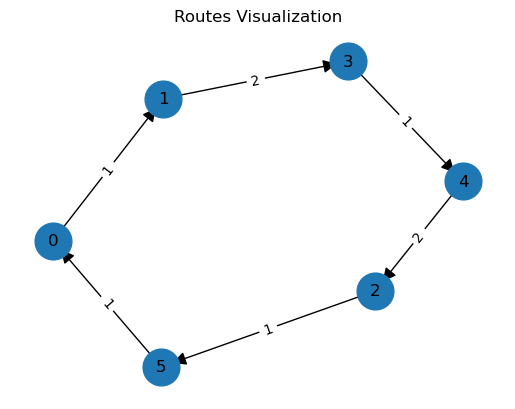

In [82]:
G = nx.DiGraph()

# Add nodes
for loc in localidades:
    G.add_node(loc)

# Add edges based on the decision variables
for i in localidades:
    for j in localidades:
        if model.x[i, j].value > 0.5:  # Check if the route is chosen
            G.add_edge(i, j, weight=costos[i, j])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Edge labels for costs
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.title("Routes Visualization")
plt.axis('off')  # Turn off the axis
plt.show()

## Problem 3: Optimization of Sensor Placement in Smart Cities

Sets:

* Locations: L = {L1, L2, L3, L4, L5, L6, L7, L8, L9, L10, L11, L12}

* Sensors: S = {Enviromental Sensor, Traffic Sensor, Public Safety Sensor}

Parameters:

* Energy consumption cost of sensor s.
$$E_{s} \space \forall s \in S$$

* Cost of installation at the location l.
$$I_{l} \space \forall l \in L$$

* Cost of communication of a sensor s in a location l.
$$C_{s,l} \space \forall s \in S, l \in L$$

* Binary parameter indicating whether sensor s can cover location l directly.
$$k_{s,l} \space \forall s \in S, l \in L$$

* Binary parameter indicating whether location l1 is adjacent to l2.
$$A_{l_1,l_2} \space \forall l_{1} \in L, l_{2} \in L$$

Decision variables:
* Binary decision variable indicating whether sensor s is conected at location l.
$$X_{s,l} \in \{0,1\}$$

* Binary decision variable indicating whether sensor s is selected.
$$Y_{s} \in \{0,1\}$$

Objective function:

$$\text{Minimize} \sum_{s \in S} \left( E_s \times Y_s \right) + \sum_{s \in S} \sum_{l \in L} \left( C_{s,l} \times X_{s,l} \right) + \sum_{s \in S} \sum_{l \in L} \left( I_{l} \times X_{s,l} \right)$$

Constraints:

$$ \sum_{l_1 \in L} A_{l_1, l_2} \times X_{s,l_2} \geq k_{s,l_2} \space \forall l_2 \in L, s \in S$$

$$ X_{s,l} \leq Y_{s} \space \forall s \in S, l \in L $$

In [83]:
#Modelo
model = ConcreteModel()

#Conjuntos
localidades_df = pd.read_csv('./data3/locations.csv')
localidades = RangeSet(len(localidades_df.columns))

sensores_df = pd.read_csv('./data3/sensors.csv')
sensores = RangeSet(len(sensores_df.columns))

#Parametros
sensor_coverage_df = pd.read_csv('./data3/sensor_coverage.csv')
sensor_coverage_df = sensor_coverage_df.drop(['Location'], axis=1)
sensor_coverage_df.columns = [sensor for sensor in sensores]
sensor_coverage = {}
for localidad in localidades:
    for sensor in sensores:
        sensor_coverage[(localidad, sensor)] = sensor_coverage_df[sensor][localidad-1]

energy_consumption_df = pd.read_csv('./data3/energy_consumption.csv')
energy_consumption_df = energy_consumption_df.drop(['SensorType'], axis=1)
energy_consumption = {}
for sensor in sensores:
    energy_consumption[sensor] = energy_consumption_df['EnergyConsumption'][sensor-1]   

communication_costs_df = pd.read_csv('./data3/communication_costs.csv')
communication_costs = {}
for index, row in communication_costs_df.iterrows():
    localidad = int(row['Location'].strip("L"))
    sensor = int(row['SensorType'].strip("S"))
    costo = row['CommunicationCost']
    communication_costs[(localidad,sensor)] = costo 

installation_costs_df = pd.read_csv('./data3/installation_costs.csv')
installation_costs_df = installation_costs_df.drop(['Location'], axis=1)
installation_costs = {}
for localidad in localidades:
    installation_costs[localidad] = installation_costs_df['InstallationCost'][localidad-1]    
    
zone_coverage_df = pd.read_csv('./data3/zone_coverage.csv')
zone_coverage_df = zone_coverage_df.drop(['Location'], axis=1)
zone_coverage_df.columns = [location for location in localidades]

zone_coverage = {}
for localidad in localidades:
    for localidad2 in localidades:
        zone_coverage[(localidad, localidad2)] = zone_coverage_df[localidad][localidad2-1]

model.X = Var(sensores, localidades, within=Binary)  # Si se instala un sensor en una localidad
model.Y = Var(sensores, within=Binary)           # Si se selecciona un tipo de sensor

def objective_function(model):
    return (
        sum(energy_consumption[s] * model.Y[s] for s in sensores) +
        sum(communication_costs[l,s] * model.X[s, l] for l in localidades for s in sensores) +
        sum(installation_costs[l] * model.X[s, l] for l in localidades for s in sensores)
    )
    
model.obj = Objective(rule=objective_function, sense=minimize)

# 1. Restricción de cobertura de zonas
def coverage_constraint(model, l2, s):
    return sum(zone_coverage[l1, l2] * model.X[s,l1] for l1 in localidades) >= sensor_coverage[l2, s]

model.coverage_constraint = Constraint(localidades, sensores, rule=coverage_constraint)

# 2. Restricción de que si un sensor está instalado en una ubicación, debe ser seleccionado
def sensor_selection_constraint(model, l, s):
    return model.X[s, l] <= model.Y[s]

model.sensor_selection_constraint = Constraint(localidades, sensores, rule=sensor_selection_constraint)

# Resolver el modelo
solver = SolverFactory('glpk')
result = solver.solve(model)

print("\nSolution")
for sensor in sensores:
    for localidad in localidades:
        print(f"x[{sensor},{localidad}] = {model.X[sensor, localidad].value}")
#model.display()


Solution
x[1,1] = 0.0
x[1,2] = 1.0
x[1,3] = 0.0
x[1,4] = 0.0
x[1,5] = 0.0
x[1,6] = 0.0
x[1,7] = 0.0
x[1,8] = 1.0
x[1,9] = 0.0
x[1,10] = 0.0
x[1,11] = 1.0
x[1,12] = 0.0
x[2,1] = 0.0
x[2,2] = 0.0
x[2,3] = 0.0
x[2,4] = 0.0
x[2,5] = 0.0
x[2,6] = 0.0
x[2,7] = 0.0
x[2,8] = 0.0
x[2,9] = 0.0
x[2,10] = 0.0
x[2,11] = 1.0
x[2,12] = 0.0
x[3,1] = 0.0
x[3,2] = 1.0
x[3,3] = 0.0
x[3,4] = 0.0
x[3,5] = 0.0
x[3,6] = 0.0
x[3,7] = 0.0
x[3,8] = 1.0
x[3,9] = 0.0
x[3,10] = 0.0
x[3,11] = 0.0
x[3,12] = 0.0


UNICAMENTE TENIENDO EN CUENTA EL COSTO DE INSTALACION EN LA FUNCION OBJETIVO

In [84]:
def objective_function2(model):
    return (
        sum(installation_costs[l] * model.X[s, l] for l in localidades for s in sensores)
    )
model.obj = Objective(rule=objective_function2, sense=minimize)

# Resolver el modelo
solver = SolverFactory('glpk')
result = solver.solve(model)

print("\nSolution")
for sensor in sensores:
    for localidad in localidades:
        print(f"x[{sensor},{localidad}] = {model.X[sensor, localidad].value}")

'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().

Solution
x[1,1] = 0.0
x[1,2] = 1.0
x[1,3] = 0.0
x[1,4] = 0.0
x[1,5] = 0.0
x[1,6] = 0.0
x[1,7] = 0.0
x[1,8] = 1.0
x[1,9] = 0.0
x[1,10] = 0.0
x[1,11] = 1.0
x[1,12] = 0.0
x[2,1] = 0.0
x[2,2] = 0.0
x[2,3] = 0.0
x[2,4] = 0.0
x[2,5] = 0.0
x[2,6] = 0.0
x[2,7] = 0.0
x[2,8] = 0.0
x[2,9] = 0.0
x[2,10] = 0.0
x[2,11] = 1.0
x[2,12] = 0.0
x[3,1] = 0.0
x[3,2] = 1.0
x[3,3] = 0.0
x[3,4] = 0.0
x[3,5] = 0.0
x[3,6] = 0.0
x[3,7] = 0.0
x[3,8] = 1.0
x[3,9] = 0.0
x[3,10] = 0.0
x[3,11] = 0.0
x[3,12] = 0.0


Como podemos observar, aun cambiando de manera significa la funcion objetivo, obtenemos el mismo resultado para el modelo de optimizacion. Esto se debe a que multiples caminos y modelos diferentes nos pueden llevar a un mismo resultado. Mas no al reves, un modelo solo puede producir un unico resultado ya que se trata de modelos deterministicos. 